# Which locations have the highest/lowest incidence of heart disease?

In [23]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
heartDF = pd.read_csv('Resources/heart_2022_no_nans.csv')
heartDF.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
# heartDF.dtypes

In [4]:
heartReducedDF = heartDF[["State", "Sex", "GeneralHealth", "PhysicalHealthDays", "HadHeartAttack", "HadAngina"]]
heartReducedDF.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,HadHeartAttack,HadAngina
0,Alabama,Female,Very good,4.0,No,No
1,Alabama,Male,Very good,0.0,No,No
2,Alabama,Male,Very good,0.0,No,No
3,Alabama,Female,Fair,5.0,No,No
4,Alabama,Female,Good,3.0,No,No


In [5]:
attackPOS = heartReducedDF.loc[(heartReducedDF["HadHeartAttack"] == "Yes")]
attackPOS.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,HadHeartAttack,HadAngina
7,Alabama,Male,Fair,5.0,Yes,Yes
12,Alabama,Male,Good,5.0,Yes,No
34,Alabama,Male,Good,0.0,Yes,Yes
37,Alabama,Male,Good,3.0,Yes,Yes
43,Alabama,Male,Good,0.0,Yes,Yes


In [6]:
posAVG = attackPOS["PhysicalHealthDays"].mean()
print(posAVG)

8.785336806847786


In [7]:
attackNEG = heartReducedDF.loc[(heartReducedDF["HadHeartAttack"] == "No")]
attackNEG.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,HadHeartAttack,HadAngina
0,Alabama,Female,Very good,4.0,No,No
1,Alabama,Male,Very good,0.0,No,No
2,Alabama,Male,Very good,0.0,No,No
3,Alabama,Female,Fair,5.0,No,No
4,Alabama,Female,Good,3.0,No,No


In [8]:
negAVG = attackNEG["PhysicalHealthDays"].mean()
print(negAVG)

3.849484279000976


In [9]:
phyHealth = heartReducedDF['PhysicalHealthDays'].mean()
print(phyHealth)

4.119025940769525


In [47]:
stateGroup = heartReducedDF.groupby('State')['PhysicalHealthDays'].mean()
stateRound = round(stateGroup, 2)
stateRoundDF = pd.DataFrame(stateRound)
stateRoundDF.head()

,PhysicalHealthDays
State,
Alabama,4.64
Alaska,4.21
Arizona,4.56
Arkansas,5.51
California,4.18


In [ ]:
xAxis = np.arange(len(stateRound))
tick_locations = [num+0.4 for num in xAxis]

plt.bar(xAxis, stateRoundDF["PhysicalHealthDays"], color="red", alpha=0.5, align="edge")
plt.xticks(tick_locations, stateRoundDF["State"], rotation="vertical")
plt.show()

In [11]:
stateRoundList = stateRound.values.tolist()
print(stateRoundList)

[4.64, 4.21, 4.56, 5.51, 4.18, 3.77, 3.97, 3.78, 2.88, 4.53, 4.31, 3.54, 3.55, 4.19, 3.83, 4.37, 3.74, 3.6, 4.9, 4.65, 4.04, 3.92, 3.6, 4.07, 3.54, 3.83, 4.67, 4.15, 3.9, 4.94, 3.9, 3.77, 4.78, 3.91, 3.86, 3.49, 4.48, 4.48, 4.14, 4.05, 5.07, 4.27, 4.15, 3.56, 4.91, 4.39, 4.06, 3.74, 3.19, 4.1, 4.15, 5.69, 4.05, 3.92]


In [14]:
stateGroup.max()

5.693678547410895

In [15]:
wvDF = heartReducedDF.loc[
    (heartReducedDF['State']=="West Virginia")]
wvHealth = wvDF['PhysicalHealthDays'].mean()
wvHistory = wvDF.loc[
    (wvDF['HadHeartAttack']=="Yes") | (wvDF['HadAngina']=="Yes"), :]
attackCountWV = wvHistory['HadHeartAttack'].value_counts() 
anginaCountWV = wvHistory['HadAngina'].value_counts()
print(attackCountWV)
print(anginaCountWV)
print(wvHealth)
wvDF.head()

HadHeartAttack
Yes    246
No     138
Name: count, dtype: int64
HadAngina
Yes    272
No     112
Name: count, dtype: int64
5.693678547410895


,State,Sex,GeneralHealth,PhysicalHealthDays,HadHeartAttack,HadAngina
228631,West Virginia,Female,Very good,0.0,No,No
228632,West Virginia,Male,Very good,0.0,No,No
228633,West Virginia,Female,Very good,0.0,No,No
228634,West Virginia,Female,Good,0.0,No,No
228635,West Virginia,Female,Good,0.0,No,No


In [16]:
wvDF.value_counts("Sex")

Sex
Female    1685
Male      1289
Name: count, dtype: int64

In [17]:
wvDF.value_counts("GeneralHealth")

GeneralHealth
Good         958
Very good    942
Fair         499
Excellent    337
Poor         238
Name: count, dtype: int64

<BarContainer object of 5 artists>

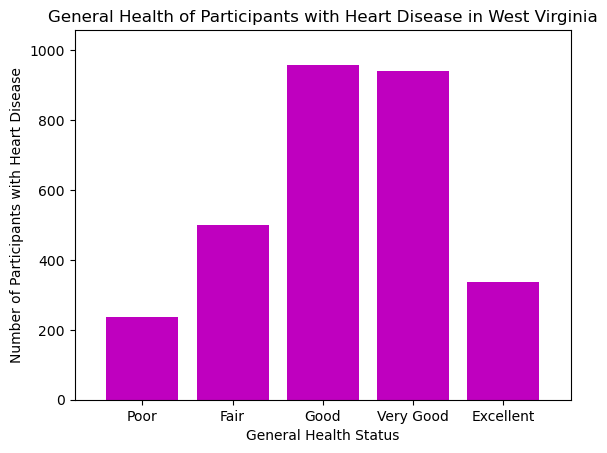

In [45]:
# visualization of participants' general health WITH heart disease in state with highest avg physical well being
participants = [238, 499, 958, 942, 337]
x_axis = np.arange(len(participants))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Poor", "Fair", "Good", "Very Good", "Excellent"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(participants)+100)
plt.title("General Health of Participants with Heart Disease in West Virginia")
plt.xlabel("General Health Status")
plt.ylabel("Number of Participants with Heart Disease")
# path = os.path.join("..","visualizations","General Health of Highest WV")
# plt.savefig(path)
plt.bar(x_axis, participants, color="m", align="center")

In [18]:
stateGroup.min()

2.878260869565217

In [19]:
dcDF = heartReducedDF.loc[
    (heartReducedDF['State']=="District of Columbia")]
dcHealth = dcDF['PhysicalHealthDays'].mean()
dcHistory = dcDF.loc[
    (dcDF['HadHeartAttack']=="Yes") | (dcDF['HadAngina']=="Yes"), :]
attackCountDC = dcHistory['HadHeartAttack'].value_counts() 
anginaCountDC = dcHistory['HadAngina'].value_counts()
print(attackCountDC)
print(anginaCountDC)
print(dcHealth)
dcDF.head()

HadHeartAttack
Yes    59
No     37
Name: count, dtype: int64
HadAngina
Yes    61
No     35
Name: count, dtype: int64
2.878260869565217


,State,Sex,GeneralHealth,PhysicalHealthDays,HadHeartAttack,HadAngina
30972,District of Columbia,Female,Good,0.0,No,No
30973,District of Columbia,Female,Fair,10.0,Yes,Yes
30974,District of Columbia,Male,Good,0.0,No,No
30975,District of Columbia,Female,Very good,0.0,No,No
30976,District of Columbia,Male,Good,0.0,No,No


In [20]:
dcDF.value_counts("Sex")

Sex
Female    964
Male      761
Name: count, dtype: int64

In [21]:
dcDF.value_counts("GeneralHealth")

GeneralHealth
Very good    641
Good         466
Excellent    419
Fair         163
Poor          36
Name: count, dtype: int64

<BarContainer object of 5 artists>

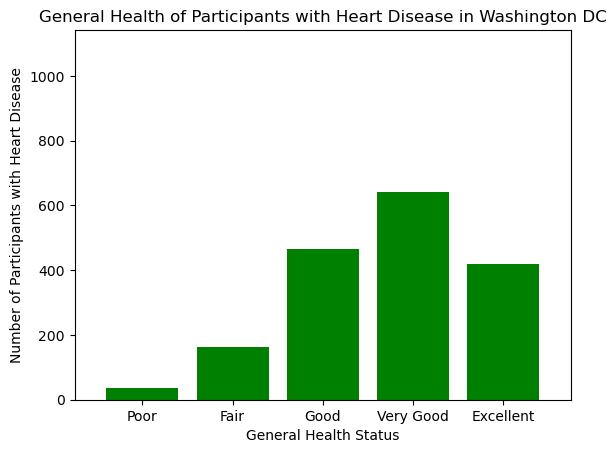

In [38]:
# visualization of participants' general health WITH heart disease in state with lowest avg physical well being
participants = [36, 163, 466, 641, 419]
x_axis = np.arange(len(participants))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Poor", "Fair", "Good", "Very Good", "Excellent"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(participants)+500)
plt.title("General Health of Participants with Heart Disease in Washington DC")
plt.xlabel("General Health Status")
plt.ylabel("Number of Participants with Heart Disease")
# path = os.path.join("..","visualizations","General Health of Lowest DC")
# plt.savefig(path)
plt.bar(x_axis, participants, color="g", align="center")

In [ ]:
# genHealthGroupDF = heartReducedDF.groupby('State')['GeneralHealth'].value_counts()
# genHealthGroupDF
# genDF = pd.DataFrame(genHealthGroupDF)
# genDF.head()